In [37]:
import pandas as pd


country_vaccinations_path = 'data/country_vaccinations.csv'
daily_covid_info_path = 'data/daily_covid_info.csv'

country_vaccinations = pd.read_csv(country_vaccinations_path)
daily_covid_info = pd.read_csv(daily_covid_info_path)
# filter only iso code POL
country_vaccinations_us = country_vaccinations[country_vaccinations['iso_code'] == 'USA']

daily_covid_info_us = daily_covid_info[daily_covid_info['Country_code'] == 'US']


In [38]:
daily_covid_info_us

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
41,2020-01-04,US,United States of America,AMR,NaN,0,NaN,0
419,2020-01-05,US,United States of America,AMR,NaN,0,NaN,0
521,2020-01-06,US,United States of America,AMR,NaN,0,NaN,0
899,2020-01-07,US,United States of America,AMR,NaN,0,NaN,0
1001,2020-01-08,US,United States of America,AMR,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...
437801,2025-01-01,US,United States of America,AMR,NaN,103436829,NaN,1212060
438179,2025-01-02,US,United States of America,AMR,NaN,103436829,NaN,1212060
438281,2025-01-03,US,United States of America,AMR,NaN,103436829,NaN,1212060
438659,2025-01-04,US,United States of America,AMR,NaN,103436829,NaN,1212060


In [39]:
country_vaccinations_us

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
82360,United States,USA,2020-12-13,30288.0,25125.0,5897.0,NaN,NaN,0.01,0.01,0.00,NaN,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82361,United States,USA,2020-12-14,34867.0,29543.0,6017.0,4579.0,4579.0,0.01,0.01,0.00,14.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82362,United States,USA,2020-12-15,84638.0,76984.0,6281.0,49771.0,27175.0,0.03,0.02,0.00,82.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82363,United States,USA,2020-12-16,244549.0,231496.0,6757.0,159911.0,71420.0,0.07,0.07,0.00,215.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82364,United States,USA,2020-12-17,517161.0,496980.0,7507.0,272612.0,121718.0,0.16,0.15,0.00,367.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82826,United States,USA,2022-03-24,559861103.0,255273235.0,217422759.0,155644.0,156889.0,168.63,76.89,65.49,473.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82827,United States,USA,2022-03-25,560045501.0,255322519.0,217466150.0,184398.0,149541.0,168.68,76.90,65.50,450.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82828,United States,USA,2022-03-26,560137738.0,255348742.0,217488822.0,92237.0,143396.0,168.71,76.91,65.51,432.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...
82829,United States,USA,2022-03-27,560167076.0,255357149.0,217495812.0,29338.0,137525.0,168.72,76.91,65.51,414.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://data.cdc.gov/Vaccinations/COVID-19-Vac...


In [40]:
merged_data = pd.merge(
    daily_covid_info_us,
    country_vaccinations_us,
    left_on="Date_reported",
    right_on="date",
    how="left"
)

In [41]:
merged_data["daily_vaccinations"] = merged_data["daily_vaccinations"].fillna(0)
merged_data["New_cases"] = merged_data["New_cases"].fillna(0)
merged_data["New_deaths"] = merged_data["New_deaths"].fillna(0)

In [43]:
merged_data_final = merged_data[["Date_reported", "New_cases", "New_deaths", "daily_vaccinations"]]
last_valid_date = "2022-10-20"
# merged_data_final.set_index("Date_reported", inplace=True)
merged_data_final = merged_data_final[merged_data_final['Date_reported'] <= last_valid_date]
merged_data_final.to_csv('data_output/usa_covid_analysis.csv', index=False)

<Figure size 0x1000 with 0 Axes>

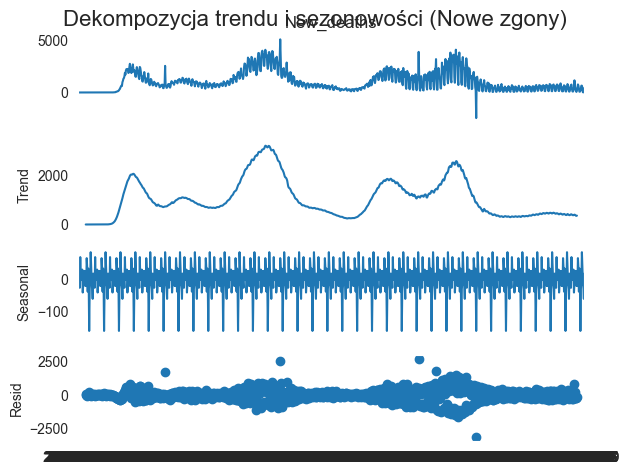

<Figure size 0x1000 with 0 Axes>

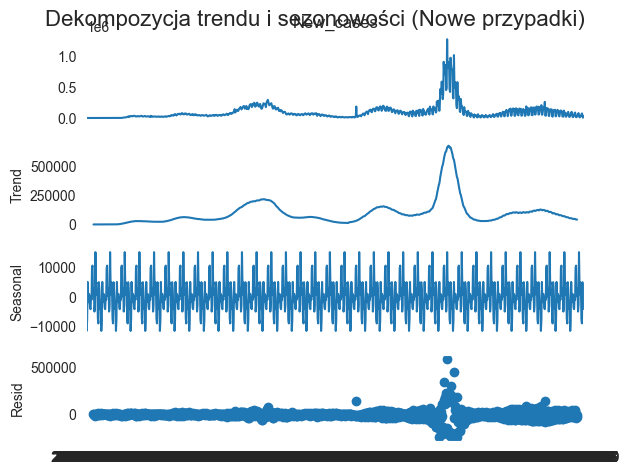

<Figure size 0x1000 with 0 Axes>

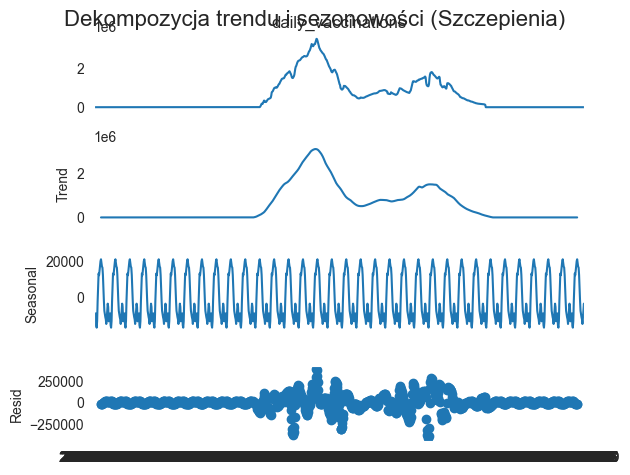

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


usaDF = pd.read_csv('data_output/usa_covid_analysis.csv')

usaDF.set_index("Date_reported", inplace=True)

decompose_result = seasonal_decompose(usaDF['New_deaths'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_result.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Nowe zgony)', fontsize=16)
plt.show()
print('=========================')

decompose_new_cases = seasonal_decompose(usaDF['New_cases'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_new_cases.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Nowe przypadki)', fontsize=16)
plt.show()

print('=========================')
decompose_result_daily_vaccinations = seasonal_decompose(usaDF['daily_vaccinations'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_result_daily_vaccinations.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Szczepienia)', fontsize=16)
plt.show()
print('=========================')

In [17]:
usaDF

,New_cases,New_deaths,daily_vaccinations
0,NaN,NaN,0.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,NaN,NaN,0.0
...,...,...,...
1824,NaN,NaN,0.0
1825,NaN,NaN,0.0
1826,NaN,NaN,0.0
1827,NaN,NaN,0.0


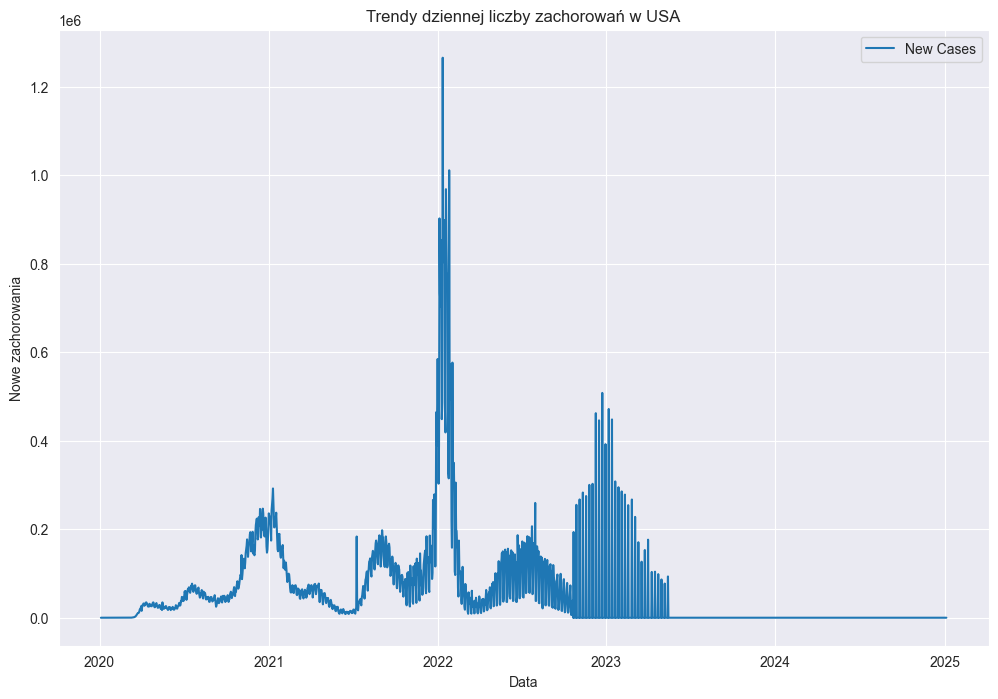

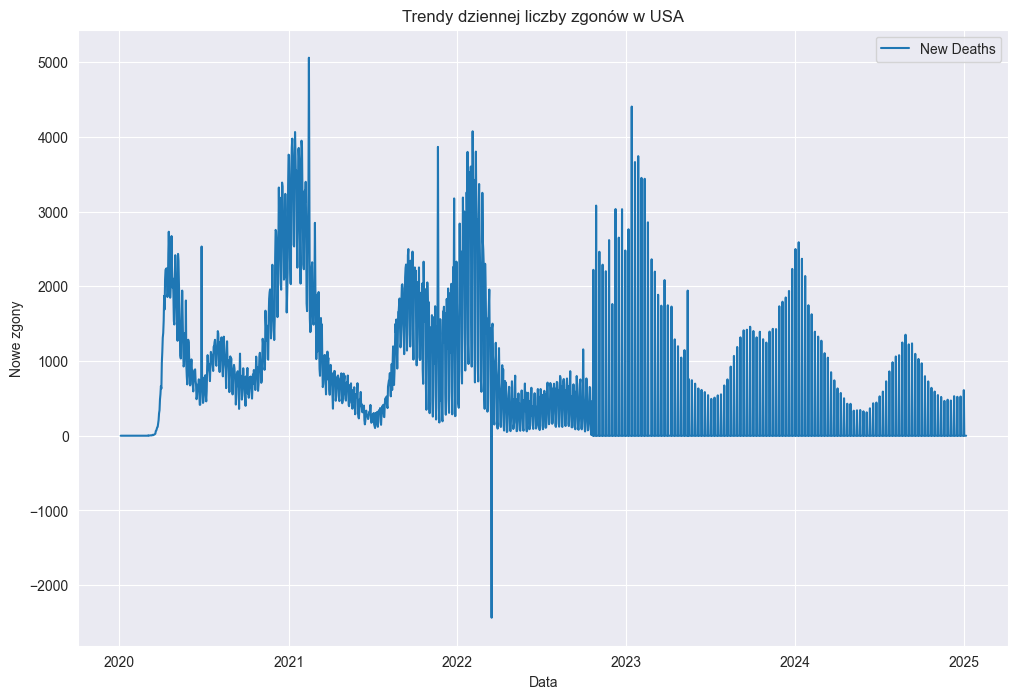

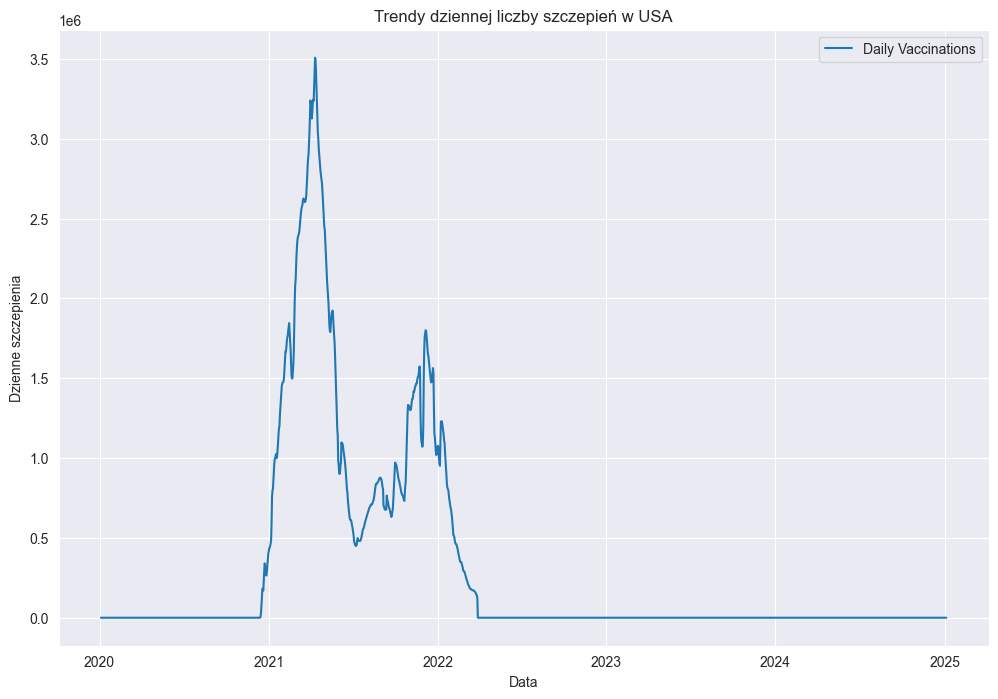

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load the provided dataset
usaDF2 = pd.read_csv('data_output/usa_covid_analysis.csv')

# Convert Date_reported to datetime format for better handling
usaDF2['Date_reported'] = pd.to_datetime(usaDF2['Date_reported'])

# Plot for New_cases
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=usaDF2,
    x='Date_reported',
    y='New_cases',
    label='New Cases'
)
plt.title('Trendy dziennej liczby zachorowań w USA')
plt.xlabel('Data')
plt.ylabel('Nowe zachorowania')
plt.grid(True)
plt.show()

# Plot for New_deaths
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=usaDF2,
    x='Date_reported',
    y='New_deaths',
    label='New Deaths'
)
plt.title('Trendy dziennej liczby zgonów w USA')
plt.xlabel('Data')
plt.ylabel('Nowe zgony')
plt.grid(True)
plt.show()

# Plot for daily_vaccinations
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=usaDF2,
    x='Date_reported',
    y='daily_vaccinations',
    label='Daily Vaccinations'
)
plt.title('Trendy dziennej liczby szczepień w USA')
plt.xlabel('Data')
plt.ylabel('Dzienne szczepienia')
plt.grid(True)
plt.show()

In [46]:
usaDF

,New_cases,New_deaths,daily_vaccinations
Date_reported,,,
2020-01-04,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0
2020-01-06,0.0,0.0,0.0
2020-01-07,0.0,0.0,0.0
2020-01-08,0.0,0.0,0.0
...,...,...,...
2022-10-16,33699.0,261.0,0.0
2022-10-17,6050.0,26.0,0.0
2022-10-18,11151.0,8.0,0.0


In [62]:
usaDF2['Year'] = usaDF2['Date_reported'].dt.year

last_valid_date = "2022-10-20"
filtered_data = usaDF2[usaDF2['Date_reported'] <= last_valid_date]

mortality_data = filtered_data.groupby('Year').apply(
    lambda df: df['New_deaths'].sum() / df['New_cases'].sum() if df['New_cases'].sum() > 0 else 0
).reset_index(name='Average Mortality Rate')

print("Yearly Average Mortality Rate:")
print(mortality_data)


Yearly Average Mortality Rate:
   Year  Average Mortality Rate
0  2020                0.017980
1  2021                0.013754
2  2022                0.005583


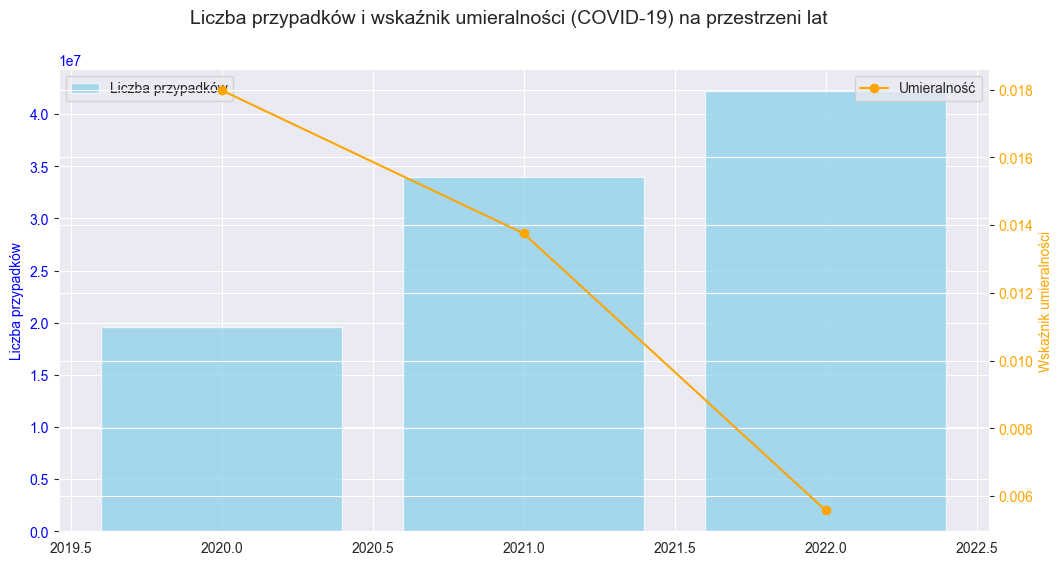

In [63]:
import matplotlib.pyplot as plt

# Dane: sumaryczna liczba przypadków, zgonów i wskaźnik umieralności per rok
yearly_data = filtered_data.groupby('Year').agg({
    'New_cases': 'sum',
    'New_deaths': 'sum'
}).reset_index()
yearly_data['Mortality Rate'] = yearly_data['New_deaths'] / yearly_data['New_cases']

# Tworzenie wykresu
fig, ax1 = plt.subplots(figsize=(12, 6))

# Liczba przypadków - oś lewa
ax1.bar(yearly_data['Year'], yearly_data['New_cases'], alpha=0.7, label='Liczba przypadków', color='skyblue')
ax1.set_ylabel('Liczba przypadków', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Wskaźnik umieralności - oś prawa
ax2 = ax1.twinx()
ax2.plot(yearly_data['Year'], yearly_data['Mortality Rate'], color='orange', marker='o', label='Umieralność')
ax2.set_ylabel('Wskaźnik umieralności', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Tytuł i legenda
fig.suptitle('Liczba przypadków i wskaźnik umieralności (COVID-19) na przestrzeni lat', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [64]:
from scipy.stats import ttest_ind

# Dane umieralności per przypadki dla poszczególnych lat
mortality_2020 = filtered_data[filtered_data['Year'] == 2020]['New_deaths'].sum() / filtered_data[filtered_data['Year'] == 2020]['New_cases'].sum()
mortality_2021 = filtered_data[filtered_data['Year'] == 2021]['New_deaths'].sum() / filtered_data[filtered_data['Year'] == 2021]['New_cases'].sum()
mortality_2022 = filtered_data[filtered_data['Year'] == 2022]['New_deaths'].sum() / filtered_data[filtered_data['Year'] == 2022]['New_cases'].sum()

# Tworzymy "grupy" na podstawie wartości
group_2020 = [mortality_2020] * int(filtered_data[filtered_data['Year'] == 2020]['New_cases'].sum())
group_2021 = [mortality_2021] * int(filtered_data[filtered_data['Year'] == 2021]['New_cases'].sum())
group_2022 = [mortality_2022] * int(filtered_data[filtered_data['Year'] == 2022]['New_cases'].sum())

# Test T-Studenta między latami (np. 2020 vs 2021, 2021 vs 2022)
t_stat_2020_2021, p_value_2020_2021 = ttest_ind(group_2020, group_2021, equal_var=False)
t_stat_2021_2022, p_value_2021_2022 = ttest_ind(group_2021, group_2022, equal_var=False)

# Wyniki
(t_stat_2020_2021, p_value_2020_2021), (t_stat_2021_2022, p_value_2021_2022)

((2.814392871544341e+16, 0.0), (8.686416498217773e+16, 0.0))

In [69]:
filtered_data2

,Date_reported,New_cases,New_deaths,daily_vaccinations,Year,Month
0,2020-01-04,0.0,0.0,0.0,2020,2020-01
1,2020-01-05,0.0,0.0,0.0,2020,2020-01
2,2020-01-06,0.0,0.0,0.0,2020,2020-01
3,2020-01-07,0.0,0.0,0.0,2020,2020-01
4,2020-01-08,0.0,0.0,0.0,2020,2020-01
...,...,...,...,...,...,...
1016,2022-10-16,33699.0,261.0,0.0,2022,2022-10
1017,2022-10-17,6050.0,26.0,0.0,2022,2022-10
1018,2022-10-18,11151.0,8.0,0.0,2022,2022-10
1019,2022-10-19,33860.0,234.0,0.0,2022,2022-10


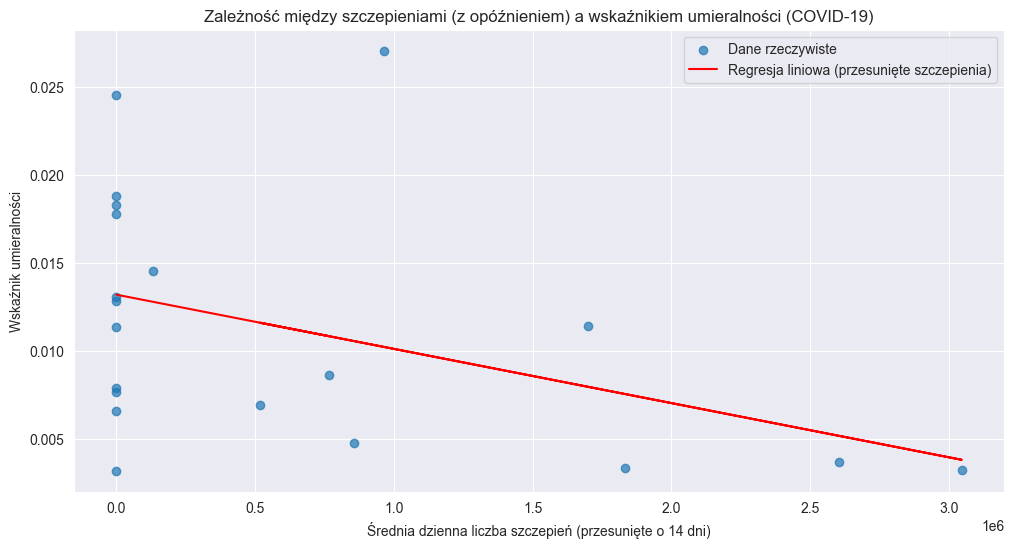

Nachylenie (coef_): [-3.0797998e-09]
Przecięcie (intercept_): 0.013180706511651668


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Kopia danych, aby uniknąć ostrzeżeń
filtered_data2 = filtered_data.copy()

# Przygotowanie danych: agregacja miesięczna dla daily_vaccinations i umieralności
filtered_data2['Month'] = filtered_data2['Date_reported'].dt.to_period('M')
monthly_data = filtered_data2.groupby('Month').agg({
    'daily_vaccinations': 'mean',
    'New_deaths': 'sum',
    'New_cases': 'sum'
}).reset_index()

# Dodanie wskaźnika umieralności
monthly_data['Mortality Rate'] = monthly_data['New_deaths'] / monthly_data['New_cases']

# Przesunięcie szczepień o 14 dni w przód
monthly_data['Shifted Vaccinations'] = monthly_data['daily_vaccinations'].shift(14)

# Usunięcie braków danych
monthly_data = monthly_data.dropna()

# Regresja liniowa: przesunięte szczepienia vs Mortality Rate
X_shifted = monthly_data[['Shifted Vaccinations']].values
y_shifted = monthly_data['Mortality Rate'].values

# Tworzenie modelu regresji
model_shifted = LinearRegression()
model_shifted.fit(X_shifted, y_shifted)
y_shifted_pred = model_shifted.predict(X_shifted)

# Wizualizacja
plt.figure(figsize=(12, 6))
plt.scatter(monthly_data['Shifted Vaccinations'], monthly_data['Mortality Rate'], alpha=0.7, label='Dane rzeczywiste')
plt.plot(monthly_data['Shifted Vaccinations'], y_shifted_pred, color='red', label='Regresja liniowa (przesunięte szczepienia)')
plt.xlabel('Średnia dzienna liczba szczepień (przesunięte o 14 dni)')
plt.ylabel('Wskaźnik umieralności')
plt.title('Zależność między szczepieniami (z opóźnieniem) a wskaźnikiem umieralności (COVID-19)')
plt.legend()
plt.grid(True)
plt.show()

# Wyniki regresji po przesunięciu
print("Nachylenie (coef_):", model_shifted.coef_)
print("Przecięcie (intercept_):", model_shifted.intercept_)


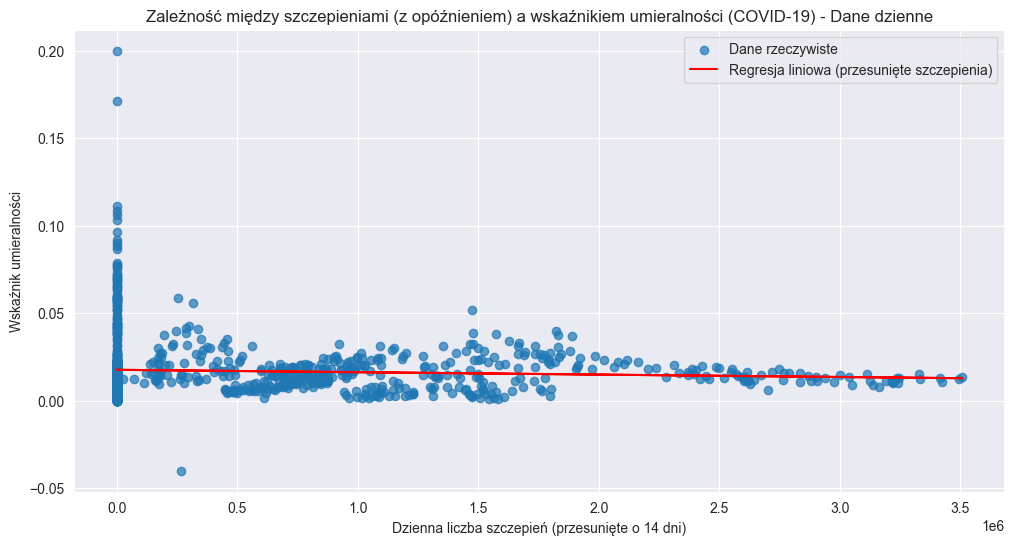

(array([-1.36736451e-09]), 0.017689750362477066)

In [70]:
# Agregacja dzienna
daily_data = filtered_data.groupby('Date_reported').agg({
    'daily_vaccinations': 'sum',
    'New_deaths': 'sum',
    'New_cases': 'sum'
}).reset_index()

# Dodanie wskaźnika umieralności
daily_data['Mortality Rate'] = daily_data['New_deaths'] / daily_data['New_cases']

# Przesunięcie liczby szczepień o 14 dni w przód
daily_data['Shifted Vaccinations'] = daily_data['daily_vaccinations'].shift(14)

# Usunięcie braków danych powstałych przez przesunięcie
daily_data = daily_data.dropna()

# Regresja liniowa: przesunięte szczepienia vs Mortality Rate
X_daily_shifted = daily_data[['Shifted Vaccinations']].values
y_daily_shifted = daily_data['Mortality Rate'].values

# Tworzenie modelu regresji
daily_model_shifted = LinearRegression()
daily_model_shifted.fit(X_daily_shifted, y_daily_shifted)
y_daily_shifted_pred = daily_model_shifted.predict(X_daily_shifted)

# Wizualizacja
plt.figure(figsize=(12, 6))
plt.scatter(daily_data['Shifted Vaccinations'], daily_data['Mortality Rate'], alpha=0.7, label='Dane rzeczywiste')
plt.plot(daily_data['Shifted Vaccinations'], y_daily_shifted_pred, color='red', label='Regresja liniowa (przesunięte szczepienia)')
plt.xlabel('Dzienna liczba szczepień (przesunięte o 14 dni)')
plt.ylabel('Wskaźnik umieralności')
plt.title('Zależność między szczepieniami (z opóźnieniem) a wskaźnikiem umieralności (COVID-19) - Dane dzienne')
plt.legend()
plt.grid(True)
plt.show()

# Wyniki regresji dziennej
daily_model_shifted.coef_, daily_model_shifted.intercept_

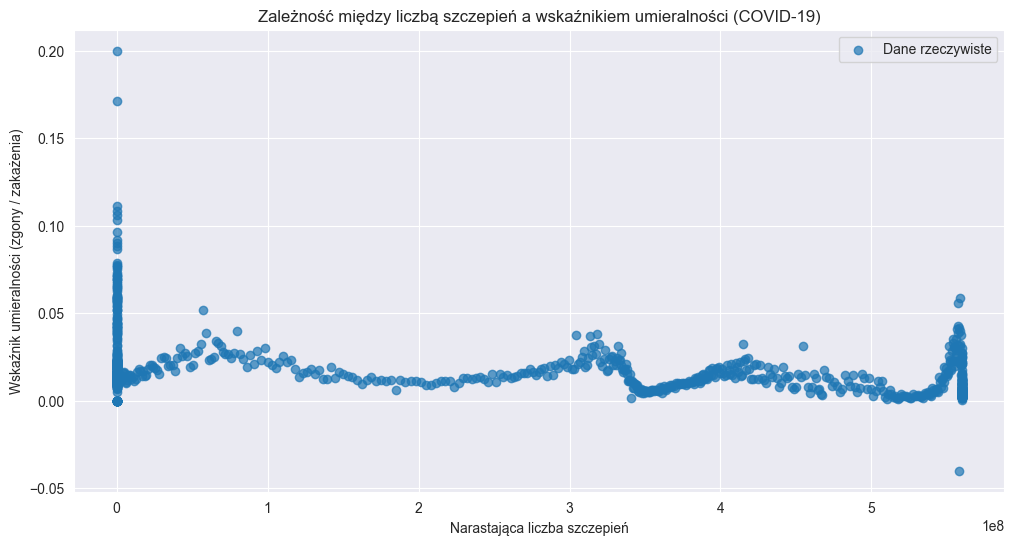

In [71]:
# Dodanie kolumny z narastającą sumą szczepień
daily_data['Cumulative Vaccinations'] = daily_data['daily_vaccinations'].cumsum()

# Usunięcie dni bez danych o przypadkach, aby uniknąć dzielenia przez zero
filtered_daily_data = daily_data[daily_data['New_cases'] > 0]

# Obliczenie wskaźnika umieralności (zgony / zakażenia)
filtered_daily_data['Mortality Rate'] = filtered_daily_data['New_deaths'] / filtered_daily_data['New_cases']

# Wizualizacja: Wskaźnik umieralności vs Suma szczepień
plt.figure(figsize=(12, 6))
plt.scatter(
    filtered_daily_data['Cumulative Vaccinations'],
    filtered_daily_data['Mortality Rate'],
    alpha=0.7,
    label='Dane rzeczywiste'
)
plt.xlabel('Narastająca liczba szczepień')
plt.ylabel('Wskaźnik umieralności (zgony / zakażenia)')
plt.title('Zależność między liczbą szczepień a wskaźnikiem umieralności (COVID-19)')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\dariu\AppData\Local\Temp\ipykernel_19360\909740392.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_daily_data2['Mortality Rate'] = filtered_daily_data2['New_deaths'] / filtered_daily_data2['New_cases']


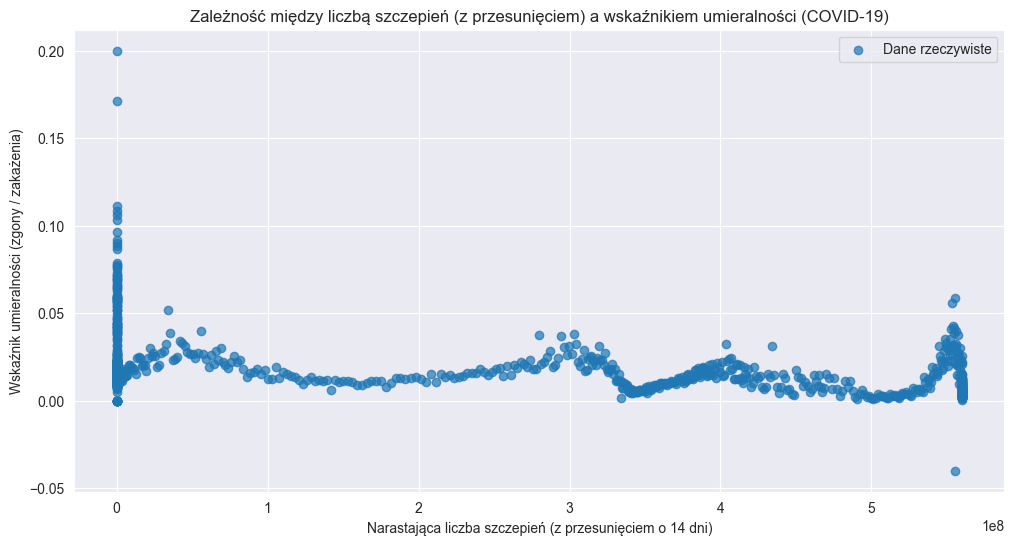

In [73]:
# Dodanie kolumny z narastającą sumą szczepień z przesunięciem o 14 dni
daily_data2 = daily_data.copy()

daily_data2['Shifted Vaccinations'] = daily_data2['daily_vaccinations'].shift(14)
daily_data2['Cumulative Vaccinations (Shifted)'] = daily_data2['Shifted Vaccinations'].cumsum()

# Usunięcie dni bez danych o przypadkach i przesunięcia
filtered_daily_data2 = daily_data2[(daily_data2['New_cases'] > 0) & (daily_data2['Cumulative Vaccinations (Shifted)'].notna())]

# Obliczenie wskaźnika umieralności (zgony / zakażenia)
filtered_daily_data2['Mortality Rate'] = filtered_daily_data2['New_deaths'] / filtered_daily_data2['New_cases']

# Wizualizacja: Wskaźnik umieralności vs Suma szczepień (z przesunięciem)
plt.figure(figsize=(12, 6))
plt.scatter(
    filtered_daily_data2['Cumulative Vaccinations (Shifted)'],
    filtered_daily_data2['Mortality Rate'],
    alpha=0.7,
    label='Dane rzeczywiste'
)
plt.xlabel('Narastająca liczba szczepień (z przesunięciem o 14 dni)')
plt.ylabel('Wskaźnik umieralności (zgony / zakażenia)')
plt.title('Zależność między liczbą szczepień (z przesunięciem) a wskaźnikiem umieralności (COVID-19)')
plt.grid(True)
plt.legend()
plt.show()


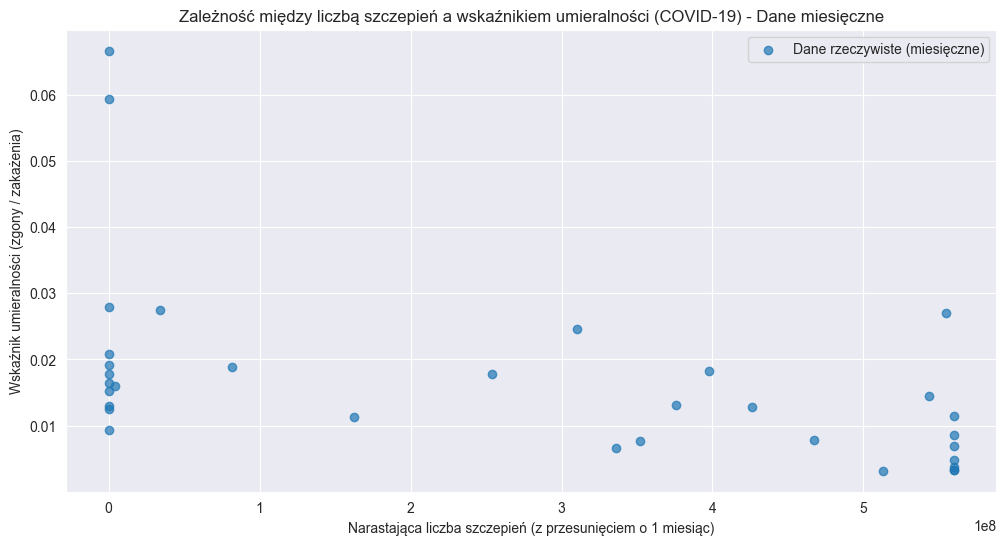

Interpretacja wykresu:
Początkowa faza szczepień:

W początkowych dniach pandemii, gdy liczba szczepień była bliska zeru, wskaźnik umieralności był wyższy. Może to wynikać z:
Braku odporności populacyjnej.
Słabo rozwiniętego leczenia i obciążenia systemu ochrony zdrowia.
Wzrost liczby szczepień:

Wraz z narastającą liczbą szczepień wskaźnik umieralności wyraźnie maleje.
Sugeruje to, że szczepienia mogły przyczynić się do zmniejszenia liczby ciężkich przypadków prowadzących do zgonów.
Stabilizacja wskaźnika umieralności:

Przy wyższej liczbie szczepień wskaźnik umieralności wydaje się stabilizować na niskim poziomie.
To może oznaczać, że osiągnięto efekt odporności populacyjnej, a zgony wynikają głównie z innych czynników (np. grupy ryzyka, opóźniony dostęp do szczepień).
Nagły wzrost na końcu wykresu:

Może być wynikiem specyficznych zdarzeń (np. pojawienie się nowego wariantu wirusa, nierówności w dostępie do szczepień w poszczególnych regionach).
Warto dokładniej zbadać te okresy.

In [51]:
usaDF2

,Date_reported,New_cases,New_deaths,daily_vaccinations,Year
0,2020-01-04,0.0,0.0,0.0,2020
1,2020-01-05,0.0,0.0,0.0,2020
2,2020-01-06,0.0,0.0,0.0,2020
3,2020-01-07,0.0,0.0,0.0,2020
4,2020-01-08,0.0,0.0,0.0,2020
...,...,...,...,...,...
1824,2025-01-01,0.0,0.0,0.0,2025
1825,2025-01-02,0.0,0.0,0.0,2025
1826,2025-01-03,0.0,0.0,0.0,2025
1827,2025-01-04,0.0,0.0,0.0,2025


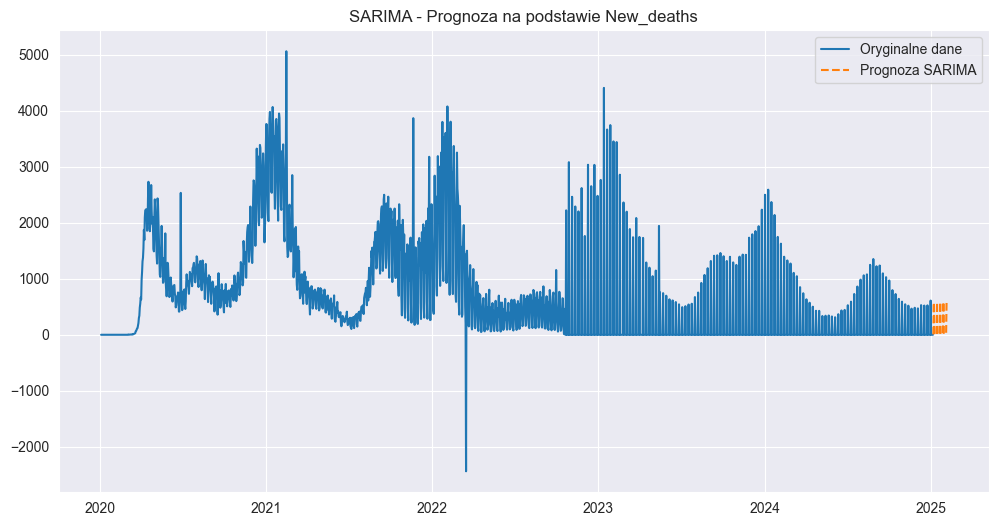

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

usaDF3 =  usaDF2

time_series = usaDF3.groupby('Date_reported')['New_deaths'].sum()

# Uzupełnienie braków zerami
time_series = time_series.asfreq('D').fillna(0)

# Test stacjonarności (ADF Test)
adf_result = adfuller(time_series)

# Dekompozycja trendu, sezonowości i reszt
decomposition = seasonal_decompose(time_series, model='additive', period=7)  # Założenie: sezonowość tygodniowa

# Dopasowanie modelu SARIMA (na początek losowe parametry)
sarima_model = SARIMAX(time_series, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_fit = sarima_model.fit(disp=False)

# Prognozy na 30 dni do przodu
forecast = sarima_fit.get_forecast(steps=30).predicted_mean

# Wyświetlenie wyników
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Oryginalne dane')
plt.plot(forecast, label='Prognoza SARIMA', linestyle='--')
plt.legend()
plt.title('SARIMA - Prognoza na podstawie New_deaths')
plt.show()

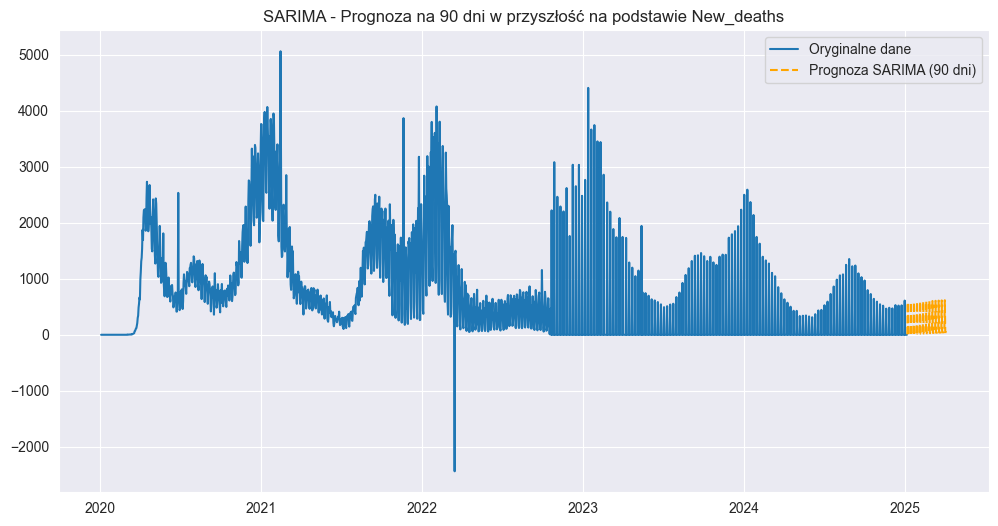

In [58]:
extended_forecast = sarima_fit.get_forecast(steps=90).predicted_mean

# Aktualizacja wykresu
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Oryginalne dane')
plt.plot(extended_forecast, label='Prognoza SARIMA (90 dni)', linestyle='--', color='orange')
plt.legend()
plt.title('SARIMA - Prognoza na 90 dni w przyszłość na podstawie New_deaths')
plt.show()